## Smallest nonzero persistent eigenvalue of a filtration

In [1]:
import tadasets
from persistent_laplacians.eigenvalues import compute_eigenvalues
torus = tadasets.torus(n=5, c=3, a=1, seed=42)

In [4]:
result = compute_eigenvalues(torus, use_scipy=True, use_stepwise_schur=False, zero_tol=1e-6)
result_2 = dict(sorted(result[2].items()))  # sorted by key
result_2

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Error in scipy routine, falling back to dense computation: PyErr { type: <class 'TypeError'>, value: TypeError('Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.'), traceback: Some(<traceback object at 0x7fc959221f80>) }
Error in scipy routine, falling back to dense computation: PyErr { type: <class 'TypeError'>, value: TypeError('Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.'), traceback: Some(<traceback object at 0x7fc913119800>) }
Error in scipy routine, falling back to dense computation: PyErr { type: <class 'TypeError'>, value: TypeError('Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.'), traceback: Some(<traceback object at 0x7fc9131392c0>) }
Error in scipy routine, falling back to dense computation: PyErr { type: <class 'TypeError'>, value: TypeError('Cannot use scipy.linal

/home/marmas/personal/repos/persistent-laplacians/python/persistent_laplacians/eigenvalues.py:13: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  return pl.smallest_eigenvalue(


{(5, 5): [3.0],
 (5, 6): [3.0],
 (5, 7): [3.0],
 (5, 8): [3.0],
 (5, 9): [3.0],
 (5, 10): [3.0],
 (5, 11): [3.0],
 (5, 12): [3.0],
 (5, 13): [3.0],
 (6, 6): [3.0],
 (6, 7): [3.0],
 (6, 8): [3.0],
 (6, 9): [3.0],
 (6, 10): [3.0],
 (6, 11): [3.0],
 (6, 12): [3.0],
 (6, 13): [3.0],
 (7, 7): [3.0],
 (7, 8): [3.0],
 (7, 9): [3.0],
 (7, 10): [3.0],
 (7, 11): [3.0],
 (7, 12): [3.0],
 (7, 13): [3.0],
 (8, 8): [3.0],
 (8, 9): [3.0],
 (8, 10): [3.0],
 (8, 11): [3.0],
 (8, 12): [3.0],
 (8, 13): [3.0],
 (9, 9): [3.0],
 (9, 10): [3.0],
 (9, 11): [3.0],
 (9, 12): [3.0],
 (9, 13): [3.0],
 (10, 10): [1.585786437626905],
 (10, 11): [1.585786437626905],
 (10, 12): [1.585786437626905],
 (10, 13): [1.585786437626905],
 (11, 11): [2.0000000000000004],
 (11, 12): [2.0000000000000004],
 (11, 13): [2.0000000000000004],
 (12, 12): [2.9999999999998668],
 (12, 13): [2.9999999999998668],
 (13, 13): [2.0000000000000386]}

In [5]:
import petls

alpha = petls.Alpha(points=torus)
petls_result = alpha.spectra(allpairs=True)

In [6]:
from collections import defaultdict

def restructure(data, filtration):
    # make lookup: float -> index
    idx_map = {v: i for i, v in enumerate(filtration)}

    out = defaultdict(dict)
    for dim, f1, f2, vals in data:
        cleaned = [v for v in vals if v != 0]
        out[dim][(idx_map[f1], idx_map[f2])] = cleaned[0] if len(cleaned) > 0 else cleaned

    return dict(out)

filtration = alpha.get_all_filtrations()
my_format = restructure(petls_result, filtration)
my_format[2]

{(0, 0): [],
 (0, 1): [],
 (0, 2): [],
 (0, 3): [],
 (0, 4): [],
 (0, 5): [],
 (0, 6): [],
 (0, 7): [],
 (0, 8): [],
 (0, 9): [],
 (0, 10): [],
 (0, 11): [],
 (0, 12): [],
 (0, 13): [],
 (1, 1): [],
 (1, 2): [],
 (1, 3): [],
 (1, 4): [],
 (1, 5): [],
 (1, 6): [],
 (1, 7): [],
 (1, 8): [],
 (1, 9): [],
 (1, 10): [],
 (1, 11): [],
 (1, 12): [],
 (1, 13): [],
 (2, 2): [],
 (2, 3): [],
 (2, 4): [],
 (2, 5): [],
 (2, 6): [],
 (2, 7): [],
 (2, 8): [],
 (2, 9): [],
 (2, 10): [],
 (2, 11): [],
 (2, 12): [],
 (2, 13): [],
 (3, 3): [],
 (3, 4): [],
 (3, 5): [],
 (3, 6): [],
 (3, 7): [],
 (3, 8): [],
 (3, 9): [],
 (3, 10): [],
 (3, 11): [],
 (3, 12): [],
 (3, 13): [],
 (4, 4): [],
 (4, 5): [],
 (4, 6): [],
 (4, 7): [],
 (4, 8): [],
 (4, 9): [],
 (4, 10): [],
 (4, 11): [],
 (4, 12): [],
 (4, 13): [],
 (5, 5): np.float32(3.0),
 (5, 6): np.float32(3.0),
 (5, 7): np.float32(3.0),
 (5, 8): np.float32(3.0),
 (5, 9): np.float32(3.0),
 (5, 10): np.float32(3.0),
 (5, 11): np.float32(3.0),
 (5, 12): np.flo

## Plot nonpersistent eigenvalues

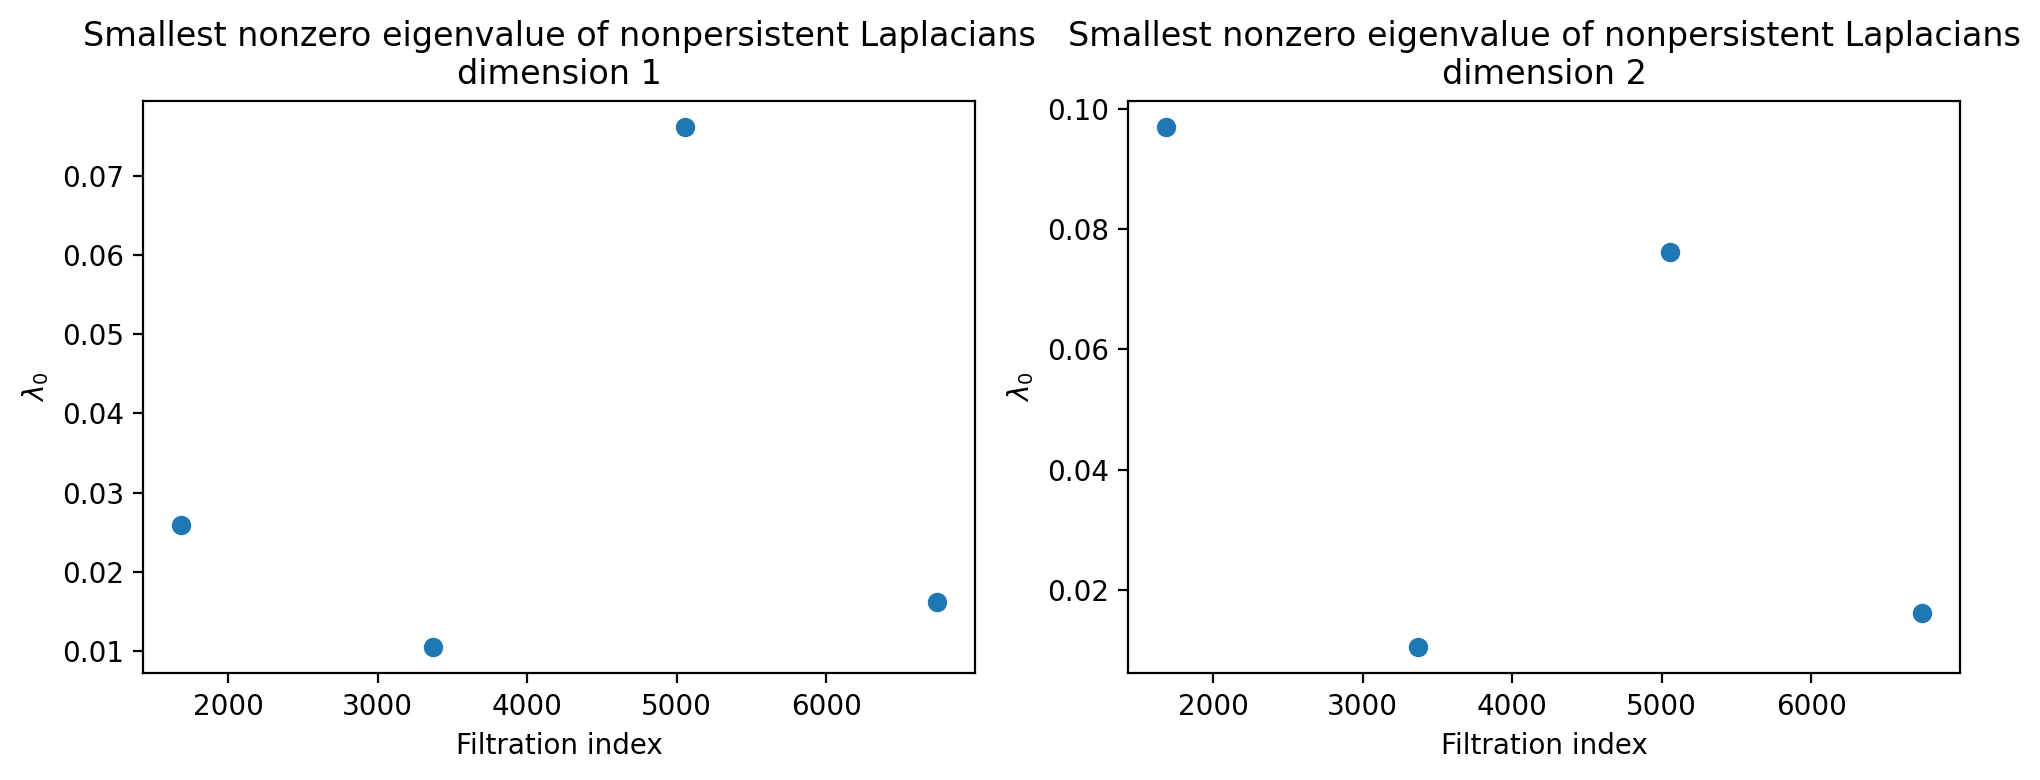

In [12]:
import matplotlib.pyplot as plt

dims = [1, 2]
fig, axes = plt.subplots(1, len(dims), figsize=(5*len(dims), 4), dpi=200)

if len(dims) == 1:
    axes = [axes]

for ax, d in zip(axes, dims):
    nonpersistent = {k[0]: v[0] for (k, v) in result[d].items() if k[0] == k[1] and len(v) >= 1}
    ax.scatter(nonpersistent.keys(), nonpersistent.values())
    ax.set_title(r"Smallest nonzero eigenvalue of nonpersistent Laplacians"
                 + "\n" + f"dimension {d}")
    ax.set_xlabel("Filtration index")
    ax.set_ylabel(r"$\lambda_0$")

plt.tight_layout()
plt.show()


## Persistent smallest nonzero eigenvalues

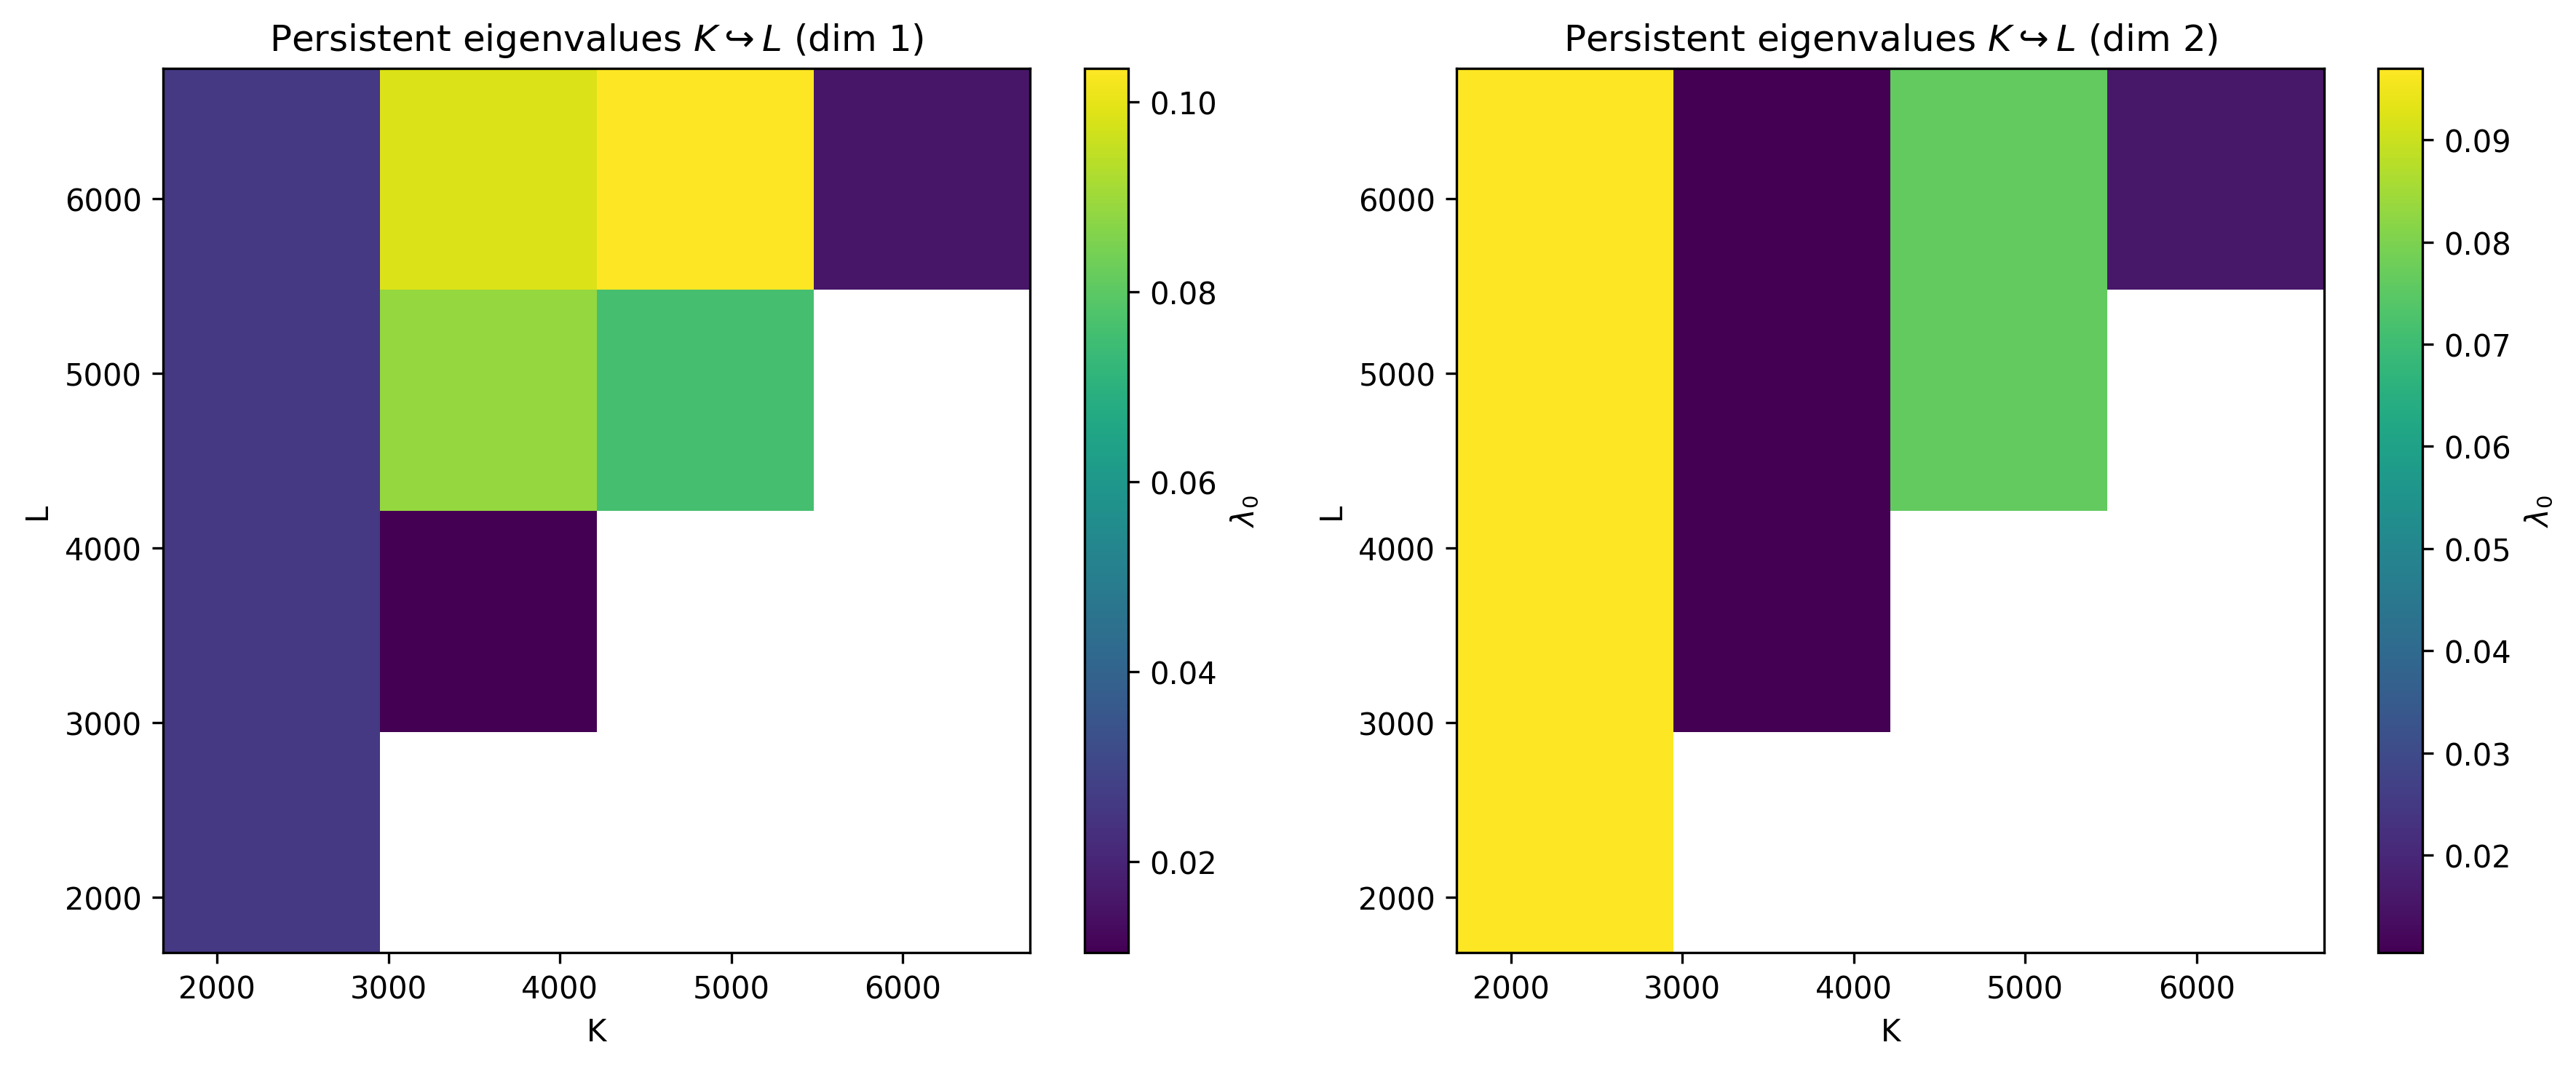

In [13]:
import numpy as np
import matplotlib.pyplot as plt

dims = [1, 2]  # change to the dimensions you want
fig, axes = plt.subplots(1, len(dims), figsize=(6*len(dims), 5), dpi=300)

if len(dims) == 1:
    axes = [axes]

for ax, d in zip(axes, dims):
    pts = {k: v for (k, v) in result[d].items() if len(v) >= 1}

    xs = sorted({x for x, y in pts})
    ys = sorted({y for x, y in pts})

    heat = np.full((len(ys), len(xs)), np.nan)
    x_i = {x:i for i,x in enumerate(xs)}
    y_i = {y:i for i,y in enumerate(ys)}

    for (x,y), v in pts.items():
        heat[y_i[y], x_i[x]] = v[0]

    im = ax.imshow(
        heat,
        origin='lower',
        extent=(min(xs), max(xs), min(ys), max(ys)),
        aspect='auto'
    )
    fig.colorbar(im, ax=ax, label=r'$\lambda_0$')
    ax.set_xlabel("K")
    ax.set_ylabel("L")
    ax.set_title(rf'Persistent eigenvalues $K \hookrightarrow L$ (dim {d})')

plt.tight_layout()
plt.show()
